# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
!pip install citipy

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
#List variables

city_list = []
cloud_list = []
country = []
date_list = []
humidity = []
lat = []
long = []
max_t_list = []
ws_list = []
index_c = 0
set_counter = 0

city = city


BASE_URL = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

query_url =  BASE_URL + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
#Looping through cities to make api calls using city as query
i = 1

for index, city in enumerate(cities, start = 1):
   
    query_url =  BASE_URL + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()

    try:
        cloud_list.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date_list.append(response["dt"])
        max_t_list.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        long.append(response["coord"]["lon"])
        ws_list.append(response["wind"]["speed"])
        city_list.append(response["name"])
        
        print(f"Procesing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Procesing record 1|khatanga
Procesing record 2|vila franca do campo
Procesing record 3|talnakh
Procesing record 4|airai
Procesing record 5|qaanaaq
Procesing record 6|hermanus
Procesing record 7|victoria
Procesing record 8|busselton
Procesing record 9|sinor
Procesing record 10|bikin
Procesing record 11|east london
Procesing record 12|port alfred
Procesing record 13|longyearbyen
City not found. skipping.
Procesing record 14|ushuaia
Procesing record 15|mar del plata
Procesing record 16|nema
Procesing record 17|punta arenas
Procesing record 18|atuona
Procesing record 19|ahipara
Procesing record 20|carnarvon
Procesing record 21|depok
City not found. skipping.
Procesing record 22|pevek
Procesing record 23|kapaa
Procesing record 24|shelburne
Procesing record 25|praia da vitoria
Procesing record 26|vostochnyy
City not found. skipping.
Procesing record 27|tuktoyaktuk
Procesing record 28|ladozhskaya
Procesing record 29|chibombo
Procesing record 30|new norfolk
Procesing record 31|hilo
Procesing r

Procesing record 255|yakeshi
Procesing record 256|yamada
Procesing record 257|emba
Procesing record 258|hammerfest
Procesing record 259|daru
Procesing record 260|san juan
Procesing record 261|anchorage
Procesing record 262|melo
Procesing record 263|broome
Procesing record 264|bom jesus
Procesing record 265|bilibino
City not found. skipping.
Procesing record 266|margate
Procesing record 267|kahului
Procesing record 268|korla
Procesing record 269|palana
Procesing record 270|iskateley
City not found. skipping.
Procesing record 271|miranda
Procesing record 272|gwadar
Procesing record 273|leeton
Procesing record 274|ostrovnoy
Procesing record 275|helong
Procesing record 276|hasaki
Procesing record 277|yenotayevka
Procesing record 278|bereda
Procesing record 279|zanjan
Procesing record 280|oranjemund
City not found. skipping.
Procesing record 281|siilinjarvi
Procesing record 282|soavinandriana
Procesing record 283|bindura
Procesing record 284|san andres
Procesing record 285|yunyang
Procesing

Procesing record 507|vestmannaeyjar
Procesing record 508|gornopravdinsk
City not found. skipping.
Procesing record 509|inongo
Procesing record 510|whitehorse
Procesing record 511|burnie
Procesing record 512|changde
Procesing record 513|kloulklubed
Procesing record 514|victoria point
Procesing record 515|klaksvik
Procesing record 516|gushi
Procesing record 517|kemijarvi
Procesing record 518|zhangye
Procesing record 519|sao joao da barra
Procesing record 520|pandamatenga
Procesing record 521|kompaniyivka
Procesing record 522|challans
Procesing record 523|sorland
Procesing record 524|deputatskiy
Procesing record 525|madikeri
Procesing record 526|muros
Procesing record 527|tura
Procesing record 528|ngerengere
Procesing record 529|rock sound
Procesing record 530|kemin
City not found. skipping.
City not found. skipping.
Procesing record 531|wenling
Procesing record 532|bonfim
Procesing record 533|samarai
Procesing record 534|pecos
Procesing record 535|ust-koksa
Procesing record 536|darnah
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Create DataFrame using data retrieved

city_dict = pd.DataFrame({"Cloudiness" :cloud_list,
        "Country":country,
        "Date":date_list,
        "Maximum Temperature": max_t_list,
        "Humidity":humidity,
        "Latitude":lat,
        "Longitude":long,
        "Wind Speed": ws_list,
        "City":city_list})
city_dict

,Cloudiness,Country,Date,Maximum Temperature,Humidity,Latitude,Longitude,Wind Speed,City
0,99,RU,1666236076,36.14,72,65.8522,44.2400,18.79,Mezen'
1,6,JP,1666236007,56.32,60,42.3339,142.3669,19.08,Shizunai-furukawachō
2,20,AU,1666235917,68.22,66,-42.8794,147.3294,16.11,Hobart
3,97,CO,1666236077,73.87,84,3.1533,-75.0531,3.83,Baraya
4,82,RU,1666235869,35.49,94,59.7035,30.7861,4.85,Nikolskoye
...,...,...,...,...,...,...,...,...,...
565,100,RU,1666236262,46.99,65,48.4219,42.2308,4.56,Chernyshkovskiy
566,20,US,1666235967,84.18,42,33.8583,-118.0648,6.91,Cerritos
567,0,LY,1666236263,61.05,63,30.3333,10.8500,8.01,Nālūt
568,100,CO,1666236263,61.16,99,5.4753,-75.2296,2.24,Alejandria


In [15]:
city_dict.count()

Cloudiness             570
Country                570
Date                   570
Maximum Temperature    570
Humidity               570
Latitude               570
Longitude              570
Wind Speed             570
City                   570
dtype: int64

In [16]:
#Exporting data to csv
city_dict.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

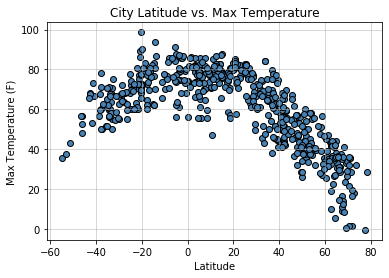

In [22]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_dict["Latitude"], city_dict["Maximum Temperature"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

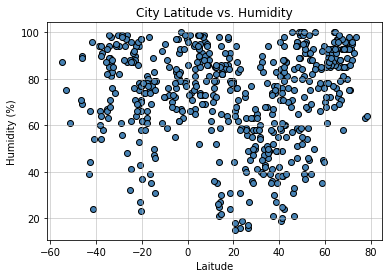

In [23]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_dict["Latitude"], city_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

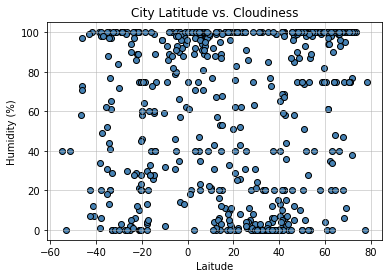

In [24]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_dict["Latitude"], city_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

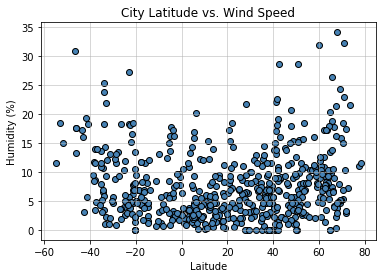

In [25]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_dict["Latitude"], city_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [26]:
#linear regression equation and line to plot

def linear_regression_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [29]:
#add Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_dict.loc[city_dict["Latitude"]>0]
Southern_hemisphere = city_dict.loc[city_dict["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.83x + 87.48
The r-squared is: -0.860154167451884
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


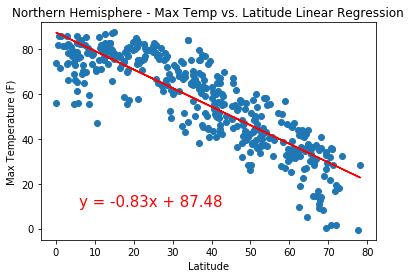

In [48]:
x_values = pd.to_numeric(Northern_hemisphere['Latitude']).astype(float)
y_values = pd.to_numeric(Northern_hemisphere['Maximum Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6477277430867531


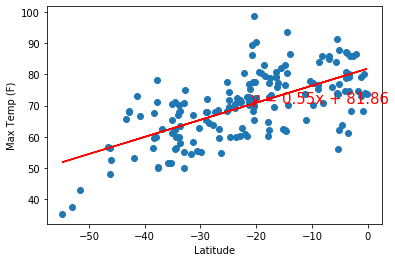

None


<Figure size 432x288 with 0 Axes>

In [38]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Maximum Temperature"]
plt.ylabel("Max Temp (F)")
print(linear_regression_plot(x_values,y_values))

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15217092714493577


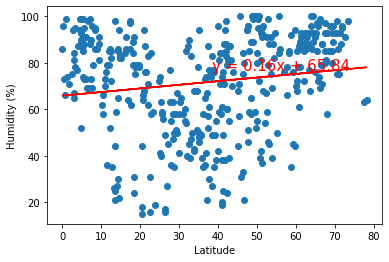

None


<Figure size 432x288 with 0 Axes>

In [39]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_regression_plot(x_values,y_values))

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.021499352172207584


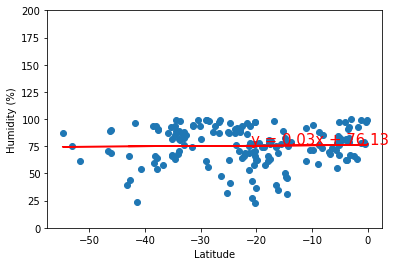

None


<Figure size 432x288 with 0 Axes>

In [40]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_regression_plot(x_values,y_values))

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1603014259173897


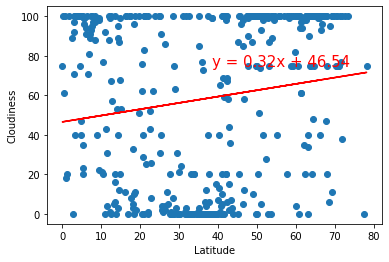

None


<Figure size 432x288 with 0 Axes>

In [41]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_regression_plot(x_values,y_values))

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20871428751113857


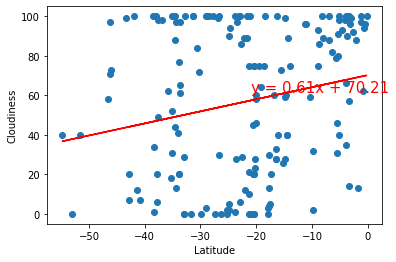

None


<Figure size 432x288 with 0 Axes>

In [42]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_regression_plot(x_values,y_values))

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.31735719974671456


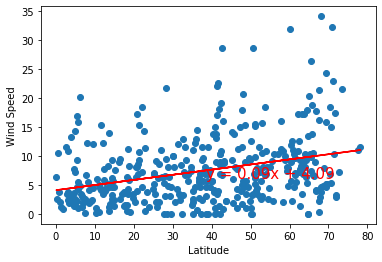

None


<Figure size 432x288 with 0 Axes>

In [43]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_regression_plot(x_values,y_values))

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.35618817395967095


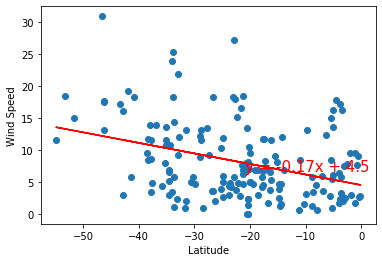

None


<Figure size 432x288 with 0 Axes>

In [44]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_regression_plot(x_values,y_values))

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")